In [29]:
import praw
import json
from datetime import datetime, timezone

# Set up your Reddit API credentials
reddit = praw.Reddit(
    client_id='eOumPJu1adSnaFQknhnmOw',       # Replace with your client ID
    client_secret='dJ4tmfjcTgiRe1DcVO4l5T__g7kYBQ',  # Replace with your client secret
    user_agent='nvidia-stock-scraper-v1',     # Replace with your user agent
)

# List of subreddits to scrape
subreddits = ['stocks', 'investing', 'nvidia', 'wallstreetbets', 'stockmarket', 'techstock',
              "pennystocks", "finance", "financialindependence", "Daytrading",
              "cryptocurrency", "LongTermInvesting", "ValueInvesting", "ETF",
              "TechNews"]

# Keyword related to Nvidia
nvidia_keywords = ["NVIDIA", "NVDA", "NVIDIA stock", "NVIDIA shares", "NVIDIA Corporation"]

# Prepare a list to hold all post data
post_data = []

# Set to track unique post IDs
seen_post_ids = set()

# Loop through each subreddit and search for Nvidia-related keywords
for subreddit_name in subreddits:
    for keyword in nvidia_keywords:
        print(f"Fetching posts for: {keyword} in subreddit: {subreddit_name}")

        try:
            # Search for posts containing the keyword
            top_posts = reddit.subreddit(subreddit_name).search(keyword, limit=800)  # Fetch up to 800 posts related to the keyword

            # Extract post details
            for post in top_posts:
                if post.id not in seen_post_ids:  # Check if post ID is unique
                    seen_post_ids.add(post.id)  # Add post ID to the set to mark it as seen

                    post_info = {
                        "stock_name": "NVIDIA",  # Hardcoded as we're searching only for Nvidia-related posts
                        "title": post.title,
                        "text": post.selftext,
                        "post_id": post.id,
                        "date": datetime.fromtimestamp(post.created_utc, timezone.utc).strftime('%Y-%m-%d %H:%M:%S'),  # Convert UTC to readable date
                        "upvotes": post.score,
                        "num_comments": post.num_comments  # Fetch only the number of comments
                    }

                    post_data.append(post_info)

        except Exception as e:
            print(f"Error fetching posts from r/{subreddit_name}: {str(e)}")  # Print the error message if something goes wrong

# Define the file path for saving the JSON data
file_path = '1sh_nvidia_stock_posts.json'

# Save the data to a JSON file
with open(file_path, 'w') as json_file:
    json.dump(post_data, json_file, indent=4)

print(f"Data has been saved to {file_path}")


Fetching posts for: NVIDIA in subreddit: stocks
Fetching posts for: NVDA in subreddit: stocks
Fetching posts for: NVIDIA stock in subreddit: stocks
Fetching posts for: NVIDIA shares in subreddit: stocks
Fetching posts for: NVIDIA Corporation in subreddit: stocks
Fetching posts for: NVIDIA in subreddit: investing
Fetching posts for: NVDA in subreddit: investing
Fetching posts for: NVIDIA stock in subreddit: investing
Fetching posts for: NVIDIA shares in subreddit: investing
Fetching posts for: NVIDIA Corporation in subreddit: investing
Fetching posts for: NVIDIA in subreddit: nvidia
Fetching posts for: NVDA in subreddit: nvidia
Fetching posts for: NVIDIA stock in subreddit: nvidia
Fetching posts for: NVIDIA shares in subreddit: nvidia
Fetching posts for: NVIDIA Corporation in subreddit: nvidia
Fetching posts for: NVIDIA in subreddit: wallstreetbets
Fetching posts for: NVDA in subreddit: wallstreetbets
Fetching posts for: NVIDIA stock in subreddit: wallstreetbets
Fetching posts for: NVID

In [30]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [4]:
import pandas as pd
import json

# Load JSON file into a Python list
#with open("1sh_nvidia_stock_posts.json", "r") as file:
with open("1sh_nvidia_stock_posts.json", "r") as file:

    json_data = json.load(file)

# Convert the list to a DataFrame
df = pd.DataFrame(json_data)


In [5]:
df

,stock_name,title,text,post_id,date,upvotes,num_comments
0,NVIDIA,NVIDIA Will Crash,So one thing that most people agree on is that...,1djm92c,2024-06-19 15:40:10,4,264
1,NVIDIA,Will Nvidia suffer due to increased tensions w...,I want to be clear this is not a political pos...,1gl3byx,2024-11-06 17:04:12,230,161
2,NVIDIA,Nvidia reports 122% revenue growth on surging ...,Nvidia reported earnings after the bell that b...,1f3judv,2024-08-28 20:27:41,2458,600
3,NVIDIA,Nvidia passes Microsoft in market cap to becom...,"Nvidia, long known in the niche gaming communi...",1divtu5,2024-06-18 17:07:58,2039,512
4,NVIDIA,"Nvidia passes Alphabet in market cap, now the ...",Nvidia surpassed Google parent Alphabet in mar...,1ar26eu,2024-02-15 00:14:14,2712,499
...,...,...,...,...,...,...,...
5628,NVIDIA,AMD's 8-core Ryzen 7 2700X drops to $195 with ...,,ddc58p,2019-10-04 19:26:50,9,4
5629,NVIDIA,"AMD Unveils Radeon R9 Nano, Targets Mini ITX G...",,3in6vt,2015-08-27 20:44:48,27,11
5630,NVIDIA,Tesla is reportedly developing its own chip wi...,,71h3hk,2017-09-21 05:33:33,42,3
5631,NVIDIA,Big tech has distracted world from existential...,,1d09uch,2024-05-25 11:21:39,739,86


In [6]:
df = df.drop(columns=["post_id"])


In [7]:
df['full_text'] = df['title'] + ' ' + df['text']
# Display the combined text
#df[['stock_name', 'full_text']]

In [8]:
df

,stock_name,title,text,date,upvotes,num_comments,full_text
0,NVIDIA,NVIDIA Will Crash,So one thing that most people agree on is that...,2024-06-19 15:40:10,4,264,NVIDIA Will Crash So one thing that most peopl...
1,NVIDIA,Will Nvidia suffer due to increased tensions w...,I want to be clear this is not a political pos...,2024-11-06 17:04:12,230,161,Will Nvidia suffer due to increased tensions w...
2,NVIDIA,Nvidia reports 122% revenue growth on surging ...,Nvidia reported earnings after the bell that b...,2024-08-28 20:27:41,2458,600,Nvidia reports 122% revenue growth on surging ...
3,NVIDIA,Nvidia passes Microsoft in market cap to becom...,"Nvidia, long known in the niche gaming communi...",2024-06-18 17:07:58,2039,512,Nvidia passes Microsoft in market cap to becom...
4,NVIDIA,"Nvidia passes Alphabet in market cap, now the ...",Nvidia surpassed Google parent Alphabet in mar...,2024-02-15 00:14:14,2712,499,"Nvidia passes Alphabet in market cap, now the ..."
...,...,...,...,...,...,...,...
5628,NVIDIA,AMD's 8-core Ryzen 7 2700X drops to $195 with ...,,2019-10-04 19:26:50,9,4,AMD's 8-core Ryzen 7 2700X drops to $195 with ...
5629,NVIDIA,"AMD Unveils Radeon R9 Nano, Targets Mini ITX G...",,2015-08-27 20:44:48,27,11,"AMD Unveils Radeon R9 Nano, Targets Mini ITX G..."
5630,NVIDIA,Tesla is reportedly developing its own chip wi...,,2017-09-21 05:33:33,42,3,Tesla is reportedly developing its own chip wi...
5631,NVIDIA,Big tech has distracted world from existential...,,2024-05-25 11:21:39,739,86,Big tech has distracted world from existential...


In [9]:
df = df.drop(['title','text'], axis=1)


In [10]:
df

,stock_name,date,upvotes,num_comments,full_text
0,NVIDIA,2024-06-19 15:40:10,4,264,NVIDIA Will Crash So one thing that most peopl...
1,NVIDIA,2024-11-06 17:04:12,230,161,Will Nvidia suffer due to increased tensions w...
2,NVIDIA,2024-08-28 20:27:41,2458,600,Nvidia reports 122% revenue growth on surging ...
3,NVIDIA,2024-06-18 17:07:58,2039,512,Nvidia passes Microsoft in market cap to becom...
4,NVIDIA,2024-02-15 00:14:14,2712,499,"Nvidia passes Alphabet in market cap, now the ..."
...,...,...,...,...,...
5628,NVIDIA,2019-10-04 19:26:50,9,4,AMD's 8-core Ryzen 7 2700X drops to $195 with ...
5629,NVIDIA,2015-08-27 20:44:48,27,11,"AMD Unveils Radeon R9 Nano, Targets Mini ITX G..."
5630,NVIDIA,2017-09-21 05:33:33,42,3,Tesla is reportedly developing its own chip wi...
5631,NVIDIA,2024-05-25 11:21:39,739,86,Big tech has distracted world from existential...


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove emojis
    text = re.sub(r'[^\w\s,]', '', text, flags=re.UNICODE)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Removes any non-alphanumeric characters
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Lemmatize words
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# Apply preprocessing on 'full_text' column
df['cleaned_text'] = df['full_text'].apply(preprocess_text)

# Display the original and cleaned text
#(df[['full_text', 'cleaned_text']])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [13]:
df


,stock_name,date,upvotes,num_comments,full_text,cleaned_text
0,NVIDIA,2024-06-19 15:40:10,4,264,NVIDIA Will Crash So one thing that most peopl...,nvidia crash one thing people agree nvidia one...
1,NVIDIA,2024-11-06 17:04:12,230,161,Will Nvidia suffer due to increased tensions w...,nvidia suffer due increased tension china want...
2,NVIDIA,2024-08-28 20:27:41,2458,600,Nvidia reports 122% revenue growth on surging ...,nvidia report revenue growth surging demand da...
3,NVIDIA,2024-06-18 17:07:58,2039,512,Nvidia passes Microsoft in market cap to becom...,nvidia pass microsoft market cap become valuab...
4,NVIDIA,2024-02-15 00:14:14,2712,499,"Nvidia passes Alphabet in market cap, now the ...",nvidia pass alphabet market cap third valuable...
...,...,...,...,...,...,...
5628,NVIDIA,2019-10-04 19:26:50,9,4,AMD's 8-core Ryzen 7 2700X drops to $195 with ...,amd core ryzen x drop ton free game ryzen x la...
5629,NVIDIA,2015-08-27 20:44:48,27,11,"AMD Unveils Radeon R9 Nano, Targets Mini ITX G...",amd unveils radeon r nano target mini itx gami...
5630,NVIDIA,2017-09-21 05:33:33,42,3,Tesla is reportedly developing its own chip wi...,tesla reportedly developing chip amd selfdrivi...
5631,NVIDIA,2024-05-25 11:21:39,739,86,Big tech has distracted world from existential...,big tech distracted world existential risk ai ...


In [14]:
df = df.drop(['full_text'], axis=1)


In [15]:
df

,stock_name,date,upvotes,num_comments,cleaned_text
0,NVIDIA,2024-06-19 15:40:10,4,264,nvidia crash one thing people agree nvidia one...
1,NVIDIA,2024-11-06 17:04:12,230,161,nvidia suffer due increased tension china want...
2,NVIDIA,2024-08-28 20:27:41,2458,600,nvidia report revenue growth surging demand da...
3,NVIDIA,2024-06-18 17:07:58,2039,512,nvidia pass microsoft market cap become valuab...
4,NVIDIA,2024-02-15 00:14:14,2712,499,nvidia pass alphabet market cap third valuable...
...,...,...,...,...,...
5628,NVIDIA,2019-10-04 19:26:50,9,4,amd core ryzen x drop ton free game ryzen x la...
5629,NVIDIA,2015-08-27 20:44:48,27,11,amd unveils radeon r nano target mini itx gami...
5630,NVIDIA,2017-09-21 05:33:33,42,3,tesla reportedly developing chip amd selfdrivi...
5631,NVIDIA,2024-05-25 11:21:39,739,86,big tech distracted world existential risk ai ...


In [16]:
pip install vaderSentiment


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [18]:
analyzer = SentimentIntensityAnalyzer()


In [19]:
# Function to compute sentiment scores
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply the function to the 'cleaned_text' column
df['sentiment_scores'] = df['cleaned_text'].apply(analyze_sentiment)

# Extract specific scores (e.g., compound, pos, neu, neg) into separate columns
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['neutral'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])


In [20]:
df

,stock_name,date,upvotes,num_comments,cleaned_text,sentiment_scores,compound,positive,neutral,negative
0,NVIDIA,2024-06-19 15:40:10,4,264,nvidia crash one thing people agree nvidia one...,"{'neg': 0.152, 'neu': 0.754, 'pos': 0.095, 'co...",-0.9198,0.095,0.754,0.152
1,NVIDIA,2024-11-06 17:04:12,230,161,nvidia suffer due increased tension china want...,"{'neg': 0.228, 'neu': 0.541, 'pos': 0.23, 'com...",-0.6914,0.230,0.541,0.228
2,NVIDIA,2024-08-28 20:27:41,2458,600,nvidia report revenue growth surging demand da...,"{'neg': 0.015, 'neu': 0.76, 'pos': 0.225, 'com...",0.9601,0.225,0.760,0.015
3,NVIDIA,2024-06-18 17:07:58,2039,512,nvidia pass microsoft market cap become valuab...,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.9882,0.136,0.864,0.000
4,NVIDIA,2024-02-15 00:14:14,2712,499,nvidia pass alphabet market cap third valuable...,"{'neg': 0.007, 'neu': 0.766, 'pos': 0.227, 'co...",0.9917,0.227,0.766,0.007
...,...,...,...,...,...,...,...,...,...,...
5628,NVIDIA,2019-10-04 19:26:50,9,4,amd core ryzen x drop ton free game ryzen x la...,"{'neg': 0.119, 'neu': 0.511, 'pos': 0.369, 'co...",0.5267,0.369,0.511,0.119
5629,NVIDIA,2015-08-27 20:44:48,27,11,amd unveils radeon r nano target mini itx gami...,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",-0.5719,0.000,0.748,0.252
5630,NVIDIA,2017-09-21 05:33:33,42,3,tesla reportedly developing chip amd selfdrivi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000
5631,NVIDIA,2024-05-25 11:21:39,739,86,big tech distracted world existential risk ai ...,"{'neg': 0.245, 'neu': 0.489, 'pos': 0.266, 'co...",0.1027,0.266,0.489,0.245


In [21]:
df = df.drop(['cleaned_text','sentiment_scores'], axis=1)


In [22]:
df

,stock_name,date,upvotes,num_comments,compound,positive,neutral,negative
0,NVIDIA,2024-06-19 15:40:10,4,264,-0.9198,0.095,0.754,0.152
1,NVIDIA,2024-11-06 17:04:12,230,161,-0.6914,0.230,0.541,0.228
2,NVIDIA,2024-08-28 20:27:41,2458,600,0.9601,0.225,0.760,0.015
3,NVIDIA,2024-06-18 17:07:58,2039,512,0.9882,0.136,0.864,0.000
4,NVIDIA,2024-02-15 00:14:14,2712,499,0.9917,0.227,0.766,0.007
...,...,...,...,...,...,...,...,...
5628,NVIDIA,2019-10-04 19:26:50,9,4,0.5267,0.369,0.511,0.119
5629,NVIDIA,2015-08-27 20:44:48,27,11,-0.5719,0.000,0.748,0.252
5630,NVIDIA,2017-09-21 05:33:33,42,3,0.0000,0.000,1.000,0.000
5631,NVIDIA,2024-05-25 11:21:39,739,86,0.1027,0.266,0.489,0.245


In [23]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])




In [24]:
df.isnull().sum()

stock_name      0
date            0
upvotes         0
num_comments    0
compound        0
positive        0
neutral         0
negative        0
dtype: int64

In [27]:
df

,stock_name,date,upvotes,num_comments,compound,positive,neutral,negative
0,NVIDIA,2024-06-19 15:40:10,4,264,-0.9198,0.095,0.754,0.152
1,NVIDIA,2024-11-06 17:04:12,230,161,-0.6914,0.230,0.541,0.228
2,NVIDIA,2024-08-28 20:27:41,2458,600,0.9601,0.225,0.760,0.015
3,NVIDIA,2024-06-18 17:07:58,2039,512,0.9882,0.136,0.864,0.000
4,NVIDIA,2024-02-15 00:14:14,2712,499,0.9917,0.227,0.766,0.007
...,...,...,...,...,...,...,...,...
5628,NVIDIA,2019-10-04 19:26:50,9,4,0.5267,0.369,0.511,0.119
5629,NVIDIA,2015-08-27 20:44:48,27,11,-0.5719,0.000,0.748,0.252
5630,NVIDIA,2017-09-21 05:33:33,42,3,0.0000,0.000,1.000,0.000
5631,NVIDIA,2024-05-25 11:21:39,739,86,0.1027,0.266,0.489,0.245


In [28]:

aggregated_data = df.groupby([df['date'].dt.date]).agg({
    'upvotes': 'sum',            # Total upvotes for each stock daily
    'num_comments': 'sum',       # Total comments for each stock daily
    'compound': 'mean',          # Average compound sentiment for each stock daily
    'positive': 'mean',          # Average positive sentiment for each stock daily
    'neutral': 'mean',           # Average neutral sentiment for each stock daily
    'negative': 'mean'           # Average negative sentiment for each stock daily
}).reset_index()

In [29]:
aggregated_data

,date,upvotes,num_comments,compound,positive,neutral,negative
0,2010-10-23,1,0,0.000000,0.000000,1.000000,0.000000
1,2010-11-16,2,0,0.177900,0.145000,0.855000,0.000000
2,2011-01-24,3,0,-0.318200,0.000000,0.753000,0.247000
3,2011-09-01,16,25,0.859100,0.316000,0.627000,0.057000
4,2012-01-13,6,0,0.961200,0.040000,0.960000,0.000000
...,...,...,...,...,...,...,...
1889,2024-12-01,6,8,0.567650,0.128000,0.848000,0.023500
1890,2024-12-02,7307,1359,0.588222,0.160111,0.736444,0.103556
1891,2024-12-03,2910,983,0.905783,0.244500,0.737500,0.018000
1892,2024-12-04,203,184,0.495380,0.145900,0.772500,0.081800


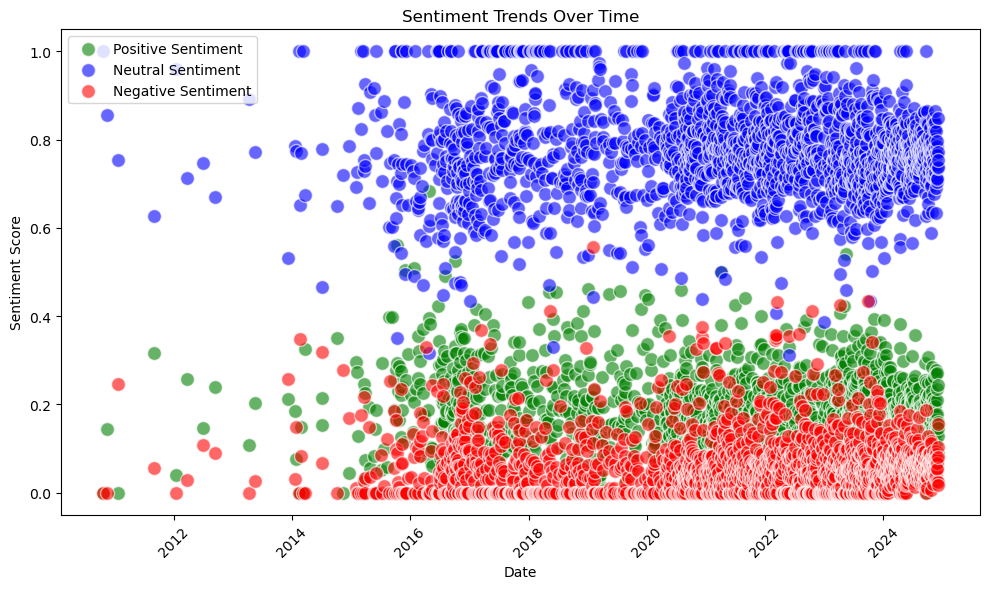

In [33]:

import matplotlib.pyplot as plt

# Plot the sentiment trends using scatter plot
plt.figure(figsize=(10, 6))

# Scatter plots for each sentiment type
plt.scatter(aggregated_data['date'], aggregated_data['positive'], label='Positive Sentiment', color='g', alpha=0.6, edgecolors='w', s=100)
plt.scatter(aggregated_data['date'], aggregated_data['neutral'], label='Neutral Sentiment', color='b', alpha=0.6, edgecolors='w', s=100)
plt.scatter(aggregated_data['date'], aggregated_data['negative'], label='Negative Sentiment', color='r', alpha=0.6, edgecolors='w', s=100)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends Over Time')

# Adding legend
plt.legend(loc='upper left')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
import yfinance as yf

# Define the stock ticker for NVIDIA
ticker = 'NVDA'

# Download historical data for NVIDIA from 2010-10-23 to the current date
nvidia_data = yf.download(ticker, start='2010-10-23', end='2024-12-01')
nvidia_data = nvidia_data.reset_index()
nvidia_data.columns = ['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']






[*********************100%***********************]  1 of 1 completed


In [39]:
nvidia_data

,date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-25,0.273081,0.297750,0.300000,0.294500,0.297250,673136000
1,2010-10-26,0.272164,0.296750,0.301250,0.291750,0.294250,675248000
2,2010-10-27,0.276062,0.301000,0.302000,0.293250,0.294000,496796000
3,2010-10-28,0.276291,0.301250,0.306000,0.298500,0.305000,704448000
4,2010-10-29,0.275603,0.300500,0.303750,0.297500,0.300750,554664000
...,...,...,...,...,...,...,...
3544,2024-11-22,141.949997,141.949997,147.160004,141.100006,145.929993,236406200
3545,2024-11-25,136.020004,136.020004,142.050003,135.820007,141.990005,344941900
3546,2024-11-26,136.919998,136.919998,139.300003,135.669998,137.699997,190287700
3547,2024-11-27,135.339996,135.339996,137.220001,131.800003,135.009995,226370900


In [40]:
import pandas as pd

# Example: Load sentiment data (already in datetime format)
# sentiment_data = pd.read_csv('your_sentiment_data.csv')
# Assuming the sentiment data has a 'date' column and a 'sentiment_score' column

# Example: Load NVIDIA stock data (already flattened)
# nvidia_data_flattened = pd.read_csv('nvidia_historical_stock_flattened.csv')

# Convert 'date' columns in both datasets to datetime format if needed
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])
nvidia_data['date'] = pd.to_datetime(nvidia_data['date'])

# Merge the two dataframes on the 'date' column
merged_data = pd.merge(nvidia_data, aggregated_data, left_on='date', right_on='date', how='outer')

# Display the merged data
print(merged_data.head())


        date      Open     High      Low    Close  Adj Close       Volume  \
0 2010-10-23       NaN      NaN      NaN      NaN        NaN          NaN   
1 2010-10-25  0.273081  0.29775  0.30000  0.29450    0.29725  673136000.0   
2 2010-10-26  0.272164  0.29675  0.30125  0.29175    0.29425  675248000.0   
3 2010-10-27  0.276062  0.30100  0.30200  0.29325    0.29400  496796000.0   
4 2010-10-28  0.276291  0.30125  0.30600  0.29850    0.30500  704448000.0   

   upvotes  num_comments  compound  positive  neutral  negative  
0      1.0           0.0       0.0       0.0      1.0       0.0  
1      NaN           NaN       NaN       NaN      NaN       NaN  
2      NaN           NaN       NaN       NaN      NaN       NaN  
3      NaN           NaN       NaN       NaN      NaN       NaN  
4      NaN           NaN       NaN       NaN      NaN       NaN  


In [41]:
merged_data

,date,Open,High,Low,Close,Adj Close,Volume,upvotes,num_comments,compound,positive,neutral,negative
0,2010-10-23,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.000000,0.000000,1.000000,0.000000
1,2010-10-25,0.273081,0.29775,0.30000,0.29450,0.29725,673136000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-10-26,0.272164,0.29675,0.30125,0.29175,0.29425,675248000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-10-27,0.276062,0.30100,0.30200,0.29325,0.29400,496796000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-10-28,0.276291,0.30125,0.30600,0.29850,0.30500,704448000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,2024-12-01,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,0.567650,0.128000,0.848000,0.023500
4052,2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,7307.0,1359.0,0.588222,0.160111,0.736444,0.103556
4053,2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,2910.0,983.0,0.905783,0.244500,0.737500,0.018000
4054,2024-12-04,NaN,NaN,NaN,NaN,NaN,NaN,203.0,184.0,0.495380,0.145900,0.772500,0.081800


In [42]:
merged_data.isnull().sum()

date               0
Open             507
High             507
Low              507
Close            507
Adj Close        507
Volume           507
upvotes         2162
num_comments    2162
compound        2162
positive        2162
neutral         2162
negative        2162
dtype: int64

In [43]:
import pandas as pd

# Specify the columns to check for missing values
columns_to_check = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Drop rows where any of the specified columns have null values
merged_data = merged_data.dropna(subset=columns_to_check)

# Display the cleaned data (first 5 rows)
print(merged_data.head())

# Optionally, save the cleaned dataset to a new CSV file
# cleaned_data.to_csv('nvidia_sentiment_cleaned.csv', index=False)


        date      Open     High      Low    Close  Adj Close       Volume  \
1 2010-10-25  0.273081  0.29775  0.30000  0.29450    0.29725  673136000.0   
2 2010-10-26  0.272164  0.29675  0.30125  0.29175    0.29425  675248000.0   
3 2010-10-27  0.276062  0.30100  0.30200  0.29325    0.29400  496796000.0   
4 2010-10-28  0.276291  0.30125  0.30600  0.29850    0.30500  704448000.0   
5 2010-10-29  0.275603  0.30050  0.30375  0.29750    0.30075  554664000.0   

   upvotes  num_comments  compound  positive  neutral  negative  
1      NaN           NaN       NaN       NaN      NaN       NaN  
2      NaN           NaN       NaN       NaN      NaN       NaN  
3      NaN           NaN       NaN       NaN      NaN       NaN  
4      NaN           NaN       NaN       NaN      NaN       NaN  
5      NaN           NaN       NaN       NaN      NaN       NaN  


In [44]:
merged_data.isnull().sum()

date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
upvotes         2162
num_comments    2162
compound        2162
positive        2162
neutral         2162
negative        2162
dtype: int64

In [45]:
merged_data.isnull().sum()

date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
upvotes         2162
num_comments    2162
compound        2162
positive        2162
neutral         2162
negative        2162
dtype: int64

In [46]:
# Fill missing values in 'upvotes' and 'num_comments' with the median
for column in ['upvotes', 'num_comments']:
    merged_data[column].fillna(merged_data[column].median(),inplace=True)

# Fill missing values in sentiment columns with the mean
for column in ['compound', 'positive', 'neutral', 'negative']:
    merged_data[column].fillna(merged_data[column].mean(),inplace=True)

# Display the cleaned data (first 5 rows)
print(merged_data.head())


        date      Open     High      Low    Close  Adj Close       Volume  \
1 2010-10-25  0.273081  0.29775  0.30000  0.29450    0.29725  673136000.0   
2 2010-10-26  0.272164  0.29675  0.30125  0.29175    0.29425  675248000.0   
3 2010-10-27  0.276062  0.30100  0.30200  0.29325    0.29400  496796000.0   
4 2010-10-28  0.276291  0.30125  0.30600  0.29850    0.30500  704448000.0   
5 2010-10-29  0.275603  0.30050  0.30375  0.29750    0.30075  554664000.0   

   upvotes  num_comments  compound  positive   neutral  negative  
1    221.0         150.0  0.451559  0.159247  0.776691  0.063928  
2    221.0         150.0  0.451559  0.159247  0.776691  0.063928  
3    221.0         150.0  0.451559  0.159247  0.776691  0.063928  
4    221.0         150.0  0.451559  0.159247  0.776691  0.063928  
5    221.0         150.0  0.451559  0.159247  0.776691  0.063928  


In [47]:
merged_data.isnull().sum()

date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
upvotes         0
num_comments    0
compound        0
positive        0
neutral         0
negative        0
dtype: int64

In [48]:
merged_data


,date,Open,High,Low,Close,Adj Close,Volume,upvotes,num_comments,compound,positive,neutral,negative
1,2010-10-25,0.273081,0.297750,0.300000,0.294500,0.297250,673136000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928
2,2010-10-26,0.272164,0.296750,0.301250,0.291750,0.294250,675248000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928
3,2010-10-27,0.276062,0.301000,0.302000,0.293250,0.294000,496796000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928
4,2010-10-28,0.276291,0.301250,0.306000,0.298500,0.305000,704448000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928
5,2010-10-29,0.275603,0.300500,0.303750,0.297500,0.300750,554664000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4042,2024-11-22,141.949997,141.949997,147.160004,141.100006,145.929993,236406200.0,8038.0,1306.0,0.371642,0.278500,0.633417,0.088083
4045,2024-11-25,136.020004,136.020004,142.050003,135.820007,141.990005,344941900.0,2506.0,1092.0,0.664322,0.148778,0.785667,0.065444
4046,2024-11-26,136.919998,136.919998,139.300003,135.669998,137.699997,190287700.0,811.0,426.0,0.792071,0.270286,0.703714,0.026000
4047,2024-11-27,135.339996,135.339996,137.220001,131.800003,135.009995,226370900.0,109.0,341.0,0.466467,0.209583,0.712000,0.078500


In [49]:
import matplotlib.pyplot as plt


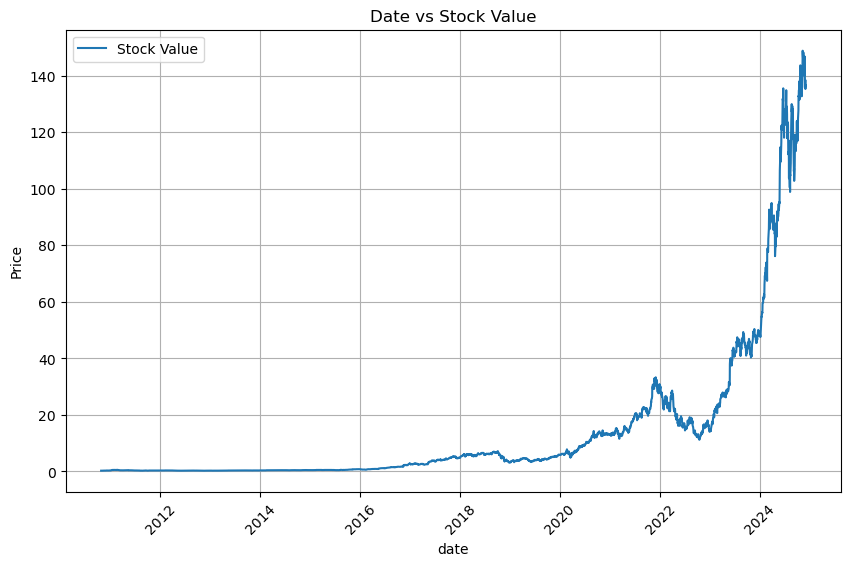

In [86]:
plt.figure(figsize=(10,6))
plt.plot(merged_data['date'], merged_data['Open'], label='Stock Value')
plt.xlabel('date')
plt.ylabel('Price')
plt.title('Date vs Stock Value')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.legend()
plt.show()


In [51]:
# Calculate 20-period Simple Moving Average (SMA)
merged_data['SMA_5'] = merged_data['Close'].rolling(window=5).mean()

# Calculate 50-period Exponential Moving Average (EMA)
merged_data['EMA_50'] = merged_data['Close'].ewm(span=50, adjust=False).mean()


In [52]:
merged_data['SMA_5'] = merged_data['SMA_5'].fillna(method='bfill')  # Backfill


In [53]:
merged_data.head(10)

,date,Open,High,Low,Close,Adj Close,Volume,upvotes,num_comments,compound,positive,neutral,negative,SMA_5,EMA_50
1,2010-10-25,0.273081,0.29775,0.30000,0.29450,0.29725,673136000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29510,0.294500
2,2010-10-26,0.272164,0.29675,0.30125,0.29175,0.29425,675248000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29510,0.294392
3,2010-10-27,0.276062,0.30100,0.30200,0.29325,0.29400,496796000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29510,0.294347
4,2010-10-28,0.276291,0.30125,0.30600,0.29850,0.30500,704448000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29510,0.294510
5,2010-10-29,0.275603,0.30050,0.30375,0.29750,0.30075,554664000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29510,0.294627
6,2010-11-01,0.276062,0.30100,0.30725,0.29850,0.30250,473920000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29590,0.294779
7,2010-11-02,0.281794,0.30725,0.31225,0.30050,0.30225,581036000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29765,0.295004
8,2010-11-03,0.283857,0.30950,0.31150,0.30125,0.30925,671748000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29925,0.295249
9,2010-11-04,0.284316,0.31000,0.31575,0.30950,0.31250,700016000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.30145,0.295807
10,2010-11-05,0.289131,0.31525,0.31800,0.31075,0.31225,735116000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.30410,0.296393


In [54]:
def calculate_rsi(merged_data, window=14):
    delta = merged_data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

merged_data['RSI_14'] = calculate_rsi(merged_data)


In [55]:
merged_data['RSI_14'] = merged_data['RSI_14'].fillna(method='bfill')  # Backfill


In [56]:
merged_data.isnull().sum()

date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
upvotes         0
num_comments    0
compound        0
positive        0
neutral         0
negative        0
SMA_5           0
EMA_50          0
RSI_14          0
dtype: int64

In [57]:
merged_data.head(10)

,date,Open,High,Low,Close,Adj Close,Volume,upvotes,num_comments,compound,positive,neutral,negative,SMA_5,EMA_50,RSI_14
1,2010-10-25,0.273081,0.29775,0.30000,0.29450,0.29725,673136000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29510,0.294500,0.000000
2,2010-10-26,0.272164,0.29675,0.30125,0.29175,0.29425,675248000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29510,0.294392,0.000000
3,2010-10-27,0.276062,0.30100,0.30200,0.29325,0.29400,496796000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29510,0.294347,35.293994
4,2010-10-28,0.276291,0.30125,0.30600,0.29850,0.30500,704448000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29510,0.294510,71.052747
5,2010-10-29,0.275603,0.30050,0.30375,0.29750,0.30075,554664000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29510,0.294627,64.285876
6,2010-11-01,0.276062,0.30100,0.30725,0.29850,0.30250,473920000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29590,0.294779,67.391428
7,2010-11-02,0.281794,0.30725,0.31225,0.30050,0.30225,581036000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29765,0.295004,72.222357
8,2010-11-03,0.283857,0.30950,0.31150,0.30125,0.30925,671748000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.29925,0.295249,73.684354
9,2010-11-04,0.284316,0.31000,0.31575,0.30950,0.31250,700016000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.30145,0.295807,83.333444
10,2010-11-05,0.289131,0.31525,0.31800,0.31075,0.31225,735116000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.30410,0.296393,84.210632


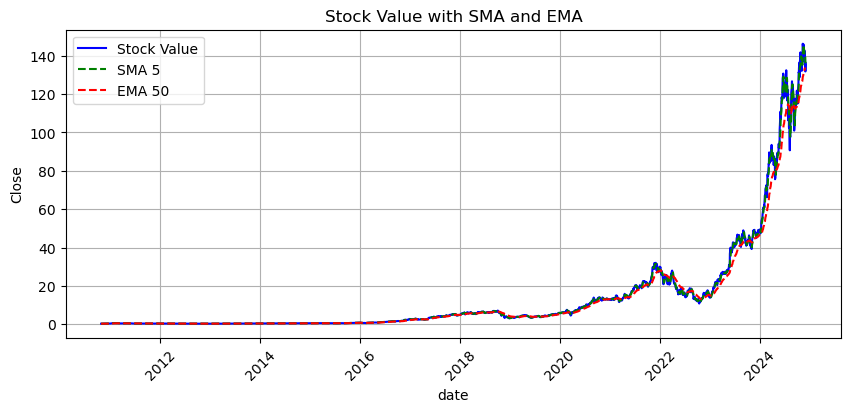

In [58]:
plt.figure(figsize=(10, 4))

# Plot Stock Values
plt.plot(merged_data['date'], merged_data['Close'], label='Stock Value', color='b')

# Plot Simple Moving Average (20)
plt.plot(merged_data['date'], merged_data['SMA_5'], label='SMA 5', color='g', linestyle='--')

# Plot Exponential Moving Average (50)
plt.plot(merged_data['date'], merged_data['EMA_50'], label='EMA 50', color='r', linestyle='--')

# Labels and formatting
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Stock Value with SMA and EMA')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

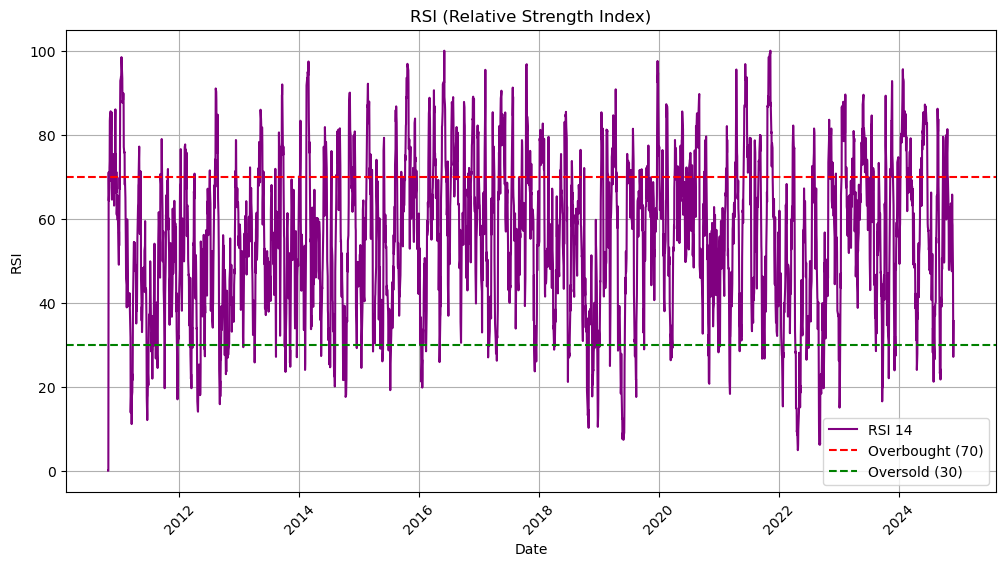

In [59]:
# Plotting RSI on a separate axis
plt.figure(figsize=(12, 6))

plt.plot(merged_data['date'], merged_data['RSI_14'], label='RSI 14', color='purple')

# Add horizontal lines for overbought and oversold levels
plt.axhline(70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='g', linestyle='--', label='Oversold (30)')

plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('RSI (Relative Strength Index)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [60]:
# Calculate 20-period Moving Average
merged_data['Bollinger_MA'] = merged_data['Close'].rolling(window=5).mean()

# Calculate 20-period Standard Deviation
merged_data['Bollinger_STD'] = merged_data['Close'].rolling(window=5).std()

# Calculate Upper and Lower Bands
merged_data['Bollinger_Upper'] = merged_data['Bollinger_MA'] + (merged_data['Bollinger_STD'] * 2)
merged_data['Bollinger_Lower'] = merged_data['Bollinger_MA'] - (merged_data['Bollinger_STD'] * 2)



In [61]:
merged_data['Bollinger_MA'] = merged_data['Bollinger_MA'].fillna(method='bfill')  # Example: Backfill
merged_data['Bollinger_STD'] = merged_data['Bollinger_STD'].fillna(method='bfill')  # Example: Backfill
merged_data['Bollinger_Upper'] = merged_data['Bollinger_Upper'].fillna(method='bfill')  # Example: Backfill
merged_data['Bollinger_Lower'] = merged_data['Bollinger_Lower'].fillna(method='bfill')  # Example: Backfill




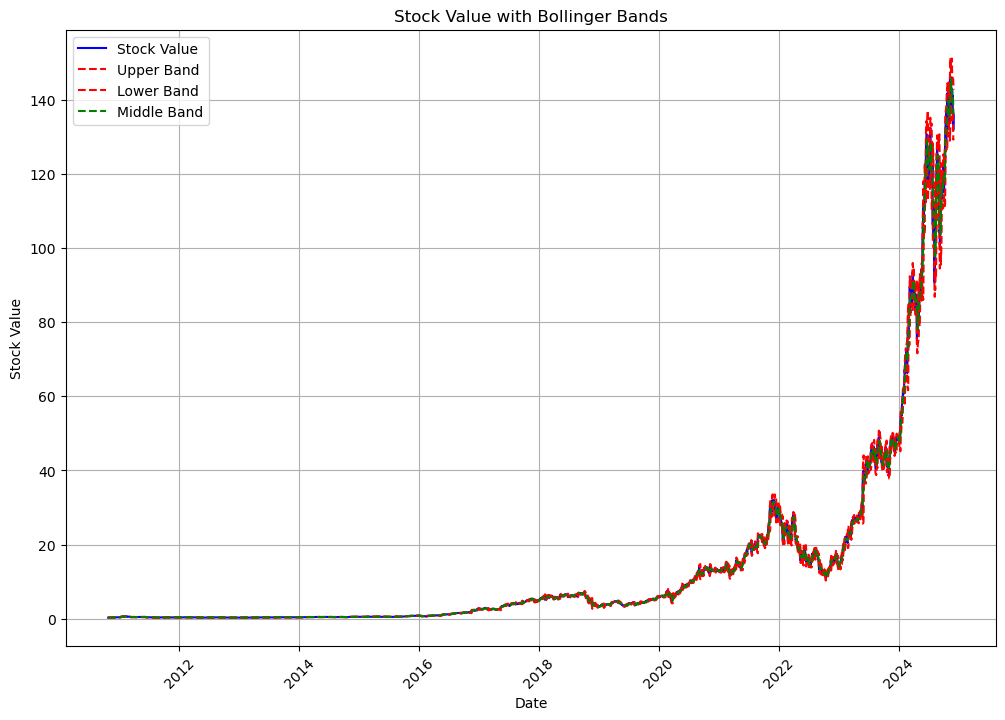

In [62]:
# Plotting Bollinger Bands
plt.figure(figsize=(12, 8))

# Plot Stock Value
plt.plot(merged_data['date'], merged_data['Close'], label='Stock Value', color='b')

# Plot Bollinger Bands
plt.plot(merged_data['date'], merged_data['Bollinger_Upper'], label='Upper Band', color='r', linestyle='--')
plt.plot(merged_data['date'], merged_data['Bollinger_Lower'], label='Lower Band', color='r', linestyle='--')
plt.plot(merged_data['date'], merged_data['Bollinger_MA'], label='Middle Band', color='g', linestyle='--')

# Labels and formatting
plt.xlabel('Date')
plt.ylabel('Stock Value')
plt.title('Stock Value with Bollinger Bands')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [63]:
merged_data

,date,Open,High,Low,Close,Adj Close,Volume,upvotes,num_comments,compound,positive,neutral,negative,SMA_5,EMA_50,RSI_14,Bollinger_MA,Bollinger_STD,Bollinger_Upper,Bollinger_Lower
1,2010-10-25,0.273081,0.297750,0.300000,0.294500,0.297250,673136000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.295100,0.294500,0.000000,0.295100,0.002843,0.300786,0.289414
2,2010-10-26,0.272164,0.296750,0.301250,0.291750,0.294250,675248000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.295100,0.294392,0.000000,0.295100,0.002843,0.300786,0.289414
3,2010-10-27,0.276062,0.301000,0.302000,0.293250,0.294000,496796000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.295100,0.294347,35.293994,0.295100,0.002843,0.300786,0.289414
4,2010-10-28,0.276291,0.301250,0.306000,0.298500,0.305000,704448000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.295100,0.294510,71.052747,0.295100,0.002843,0.300786,0.289414
5,2010-10-29,0.275603,0.300500,0.303750,0.297500,0.300750,554664000.0,221.0,150.0,0.451559,0.159247,0.776691,0.063928,0.295100,0.294627,64.285876,0.295100,0.002843,0.300786,0.289414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4042,2024-11-22,141.949997,141.949997,147.160004,141.100006,145.929993,236406200.0,8038.0,1306.0,0.371642,0.278500,0.633417,0.088083,140.534000,133.400233,58.458250,140.534000,2.051204,144.636408,136.431591
4045,2024-11-25,136.020004,136.020004,142.050003,135.820007,141.990005,344941900.0,2506.0,1092.0,0.664322,0.148778,0.785667,0.065444,140.268002,133.495126,47.914947,140.268002,2.609895,145.487792,135.048212
4046,2024-11-26,136.919998,136.919998,139.300003,135.669998,137.699997,190287700.0,811.0,426.0,0.792071,0.270286,0.703714,0.026000,139.204001,133.580415,40.088225,139.204001,3.248310,145.700621,132.707381
4047,2024-11-27,135.339996,135.339996,137.220001,131.800003,135.009995,226370900.0,109.0,341.0,0.466467,0.209583,0.712000,0.078500,137.018002,133.510595,27.110541,137.018002,3.895499,144.809001,129.227003


In [64]:
merged_data.isnull().sum()


date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
upvotes            0
num_comments       0
compound           0
positive           0
neutral            0
negative           0
SMA_5              0
EMA_50             0
RSI_14             0
Bollinger_MA       0
Bollinger_STD      0
Bollinger_Upper    0
Bollinger_Lower    0
dtype: int64

In [65]:
import numpy as np  # For logarithmic calculations

# Define look-back period (e.g., 14 days)
look_back_period = 5

# Calculate Log Momentum
merged_data['LogMomentum'] = np.log(merged_data['Close'] / merged_data['Close'].shift(look_back_period))



In [66]:
merged_data

,date,Open,High,Low,Close,Adj Close,Volume,upvotes,num_comments,compound,...,neutral,negative,SMA_5,EMA_50,RSI_14,Bollinger_MA,Bollinger_STD,Bollinger_Upper,Bollinger_Lower,LogMomentum
1,2010-10-25,0.273081,0.297750,0.300000,0.294500,0.297250,673136000.0,221.0,150.0,0.451559,...,0.776691,0.063928,0.295100,0.294500,0.000000,0.295100,0.002843,0.300786,0.289414,NaN
2,2010-10-26,0.272164,0.296750,0.301250,0.291750,0.294250,675248000.0,221.0,150.0,0.451559,...,0.776691,0.063928,0.295100,0.294392,0.000000,0.295100,0.002843,0.300786,0.289414,NaN
3,2010-10-27,0.276062,0.301000,0.302000,0.293250,0.294000,496796000.0,221.0,150.0,0.451559,...,0.776691,0.063928,0.295100,0.294347,35.293994,0.295100,0.002843,0.300786,0.289414,NaN
4,2010-10-28,0.276291,0.301250,0.306000,0.298500,0.305000,704448000.0,221.0,150.0,0.451559,...,0.776691,0.063928,0.295100,0.294510,71.052747,0.295100,0.002843,0.300786,0.289414,NaN
5,2010-10-29,0.275603,0.300500,0.303750,0.297500,0.300750,554664000.0,221.0,150.0,0.451559,...,0.776691,0.063928,0.295100,0.294627,64.285876,0.295100,0.002843,0.300786,0.289414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4042,2024-11-22,141.949997,141.949997,147.160004,141.100006,145.929993,236406200.0,8038.0,1306.0,0.371642,...,0.633417,0.088083,140.534000,133.400233,58.458250,140.534000,2.051204,144.636408,136.431591,0.007255
4045,2024-11-25,136.020004,136.020004,142.050003,135.820007,141.990005,344941900.0,2506.0,1092.0,0.664322,...,0.785667,0.065444,140.268002,133.495126,47.914947,140.268002,2.609895,145.487792,135.048212,-0.009745
4046,2024-11-26,136.919998,136.919998,139.300003,135.669998,137.699997,190287700.0,811.0,426.0,0.792071,...,0.703714,0.026000,139.204001,133.580415,40.088225,139.204001,3.248310,145.700621,132.707381,-0.038464
4047,2024-11-27,135.339996,135.339996,137.220001,131.800003,135.009995,226370900.0,109.0,341.0,0.466467,...,0.712000,0.078500,137.018002,133.510595,27.110541,137.018002,3.895499,144.809001,129.227003,-0.079669


In [67]:
merged_data['LogMomentum'] = merged_data['LogMomentum'].fillna(method='bfill')  # Backfill


In [68]:
# Save the DataFrame to a CSV file
merged_data.to_csv('stock_analysis.csv', index=False)

print("Data has been successfully saved to 'stock_analysis.csv'")


Data has been successfully saved to 'stock_analysis.csv'


In [69]:
# Import pandas for data manipulation
import pandas as pd

# Load the dataset
data = pd.read_csv('stock_analysis.csv')

# Display the first few rows of the dataset
(data.head())


,date,Open,High,Low,Close,Adj Close,Volume,upvotes,num_comments,compound,...,neutral,negative,SMA_5,EMA_50,RSI_14,Bollinger_MA,Bollinger_STD,Bollinger_Upper,Bollinger_Lower,LogMomentum
0,2010-10-25,0.273081,0.29775,0.30000,0.29450,0.29725,673136000.0,221.0,150.0,0.451559,...,0.776691,0.063928,0.2951,0.294500,0.000000,0.2951,0.002843,0.300786,0.289414,0.013491
1,2010-10-26,0.272164,0.29675,0.30125,0.29175,0.29425,675248000.0,221.0,150.0,0.451559,...,0.776691,0.063928,0.2951,0.294392,0.000000,0.2951,0.002843,0.300786,0.289414,0.013491
2,2010-10-27,0.276062,0.30100,0.30200,0.29325,0.29400,496796000.0,221.0,150.0,0.451559,...,0.776691,0.063928,0.2951,0.294347,35.293994,0.2951,0.002843,0.300786,0.289414,0.013491
3,2010-10-28,0.276291,0.30125,0.30600,0.29850,0.30500,704448000.0,221.0,150.0,0.451559,...,0.776691,0.063928,0.2951,0.294510,71.052747,0.2951,0.002843,0.300786,0.289414,0.013491
4,2010-10-29,0.275603,0.30050,0.30375,0.29750,0.30075,554664000.0,221.0,150.0,0.451559,...,0.776691,0.063928,0.2951,0.294627,64.285876,0.2951,0.002843,0.300786,0.289414,0.013491


In [70]:
# Create the target column 'momentum'
data['momentum'] = (data['Close'].shift(-1) > data['Close']).astype(int)

# Drop the last row (it has no target value for 'momentum')
data = data[:-1]

# Check the data structure
(data[['Close', 'momentum']].tail())


,Close,momentum
3543,140.699997,1
3544,141.100006,0
3545,135.820007,0
3546,135.669998,0
3547,131.800003,1


In [71]:
# Import MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler

# Select features and target
features = ['positive','neutral', 'negative', 'compound', 'upvotes', 'num_comments','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'EMA_50', 'SMA_5', 
            'RSI_14', 'Bollinger_MA', 'Bollinger_STD', 'Bollinger_Upper', 'Bollinger_Lower','LogMomentum']
X = data[features]
y = data['momentum']

X

,positive,neutral,negative,compound,upvotes,num_comments,Open,High,Low,Close,Adj Close,Volume,EMA_50,SMA_5,RSI_14,Bollinger_MA,Bollinger_STD,Bollinger_Upper,Bollinger_Lower,LogMomentum
0,0.159247,0.776691,0.063928,0.451559,221.0,150.0,0.273081,0.297750,0.300000,0.294500,0.297250,673136000.0,0.294500,0.295100,0.000000,0.295100,0.002843,0.300786,0.289414,0.013491
1,0.159247,0.776691,0.063928,0.451559,221.0,150.0,0.272164,0.296750,0.301250,0.291750,0.294250,675248000.0,0.294392,0.295100,0.000000,0.295100,0.002843,0.300786,0.289414,0.013491
2,0.159247,0.776691,0.063928,0.451559,221.0,150.0,0.276062,0.301000,0.302000,0.293250,0.294000,496796000.0,0.294347,0.295100,35.293994,0.295100,0.002843,0.300786,0.289414,0.013491
3,0.159247,0.776691,0.063928,0.451559,221.0,150.0,0.276291,0.301250,0.306000,0.298500,0.305000,704448000.0,0.294510,0.295100,71.052747,0.295100,0.002843,0.300786,0.289414,0.013491
4,0.159247,0.776691,0.063928,0.451559,221.0,150.0,0.275603,0.300500,0.303750,0.297500,0.300750,554664000.0,0.294627,0.295100,64.285876,0.295100,0.002843,0.300786,0.289414,0.013491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0.113500,0.819000,0.067556,0.339628,2206.0,1101.0,146.669998,146.669998,152.889999,140.699997,149.350006,400946600.0,133.085957,140.329999,59.206964,140.329999,2.031466,144.392932,136.267066,-0.033890
3544,0.278500,0.633417,0.088083,0.371642,8038.0,1306.0,141.949997,141.949997,147.160004,141.100006,145.929993,236406200.0,133.400233,140.534000,58.458250,140.534000,2.051204,144.636408,136.431591,0.007255
3545,0.148778,0.785667,0.065444,0.664322,2506.0,1092.0,136.020004,136.020004,142.050003,135.820007,141.990005,344941900.0,133.495126,140.268002,47.914947,140.268002,2.609895,145.487792,135.048212,-0.009745
3546,0.270286,0.703714,0.026000,0.792071,811.0,426.0,136.919998,136.919998,139.300003,135.669998,137.699997,190287700.0,133.580415,139.204001,40.088225,139.204001,3.248310,145.700621,132.707381,-0.038464


In [72]:
# Import MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the feature data to scale between 0 and 1
X_normalized = scaler.fit_transform(X)

# Check normalized features
(pd.DataFrame(X_normalized, columns=features).head())


,positive,neutral,negative,compound,upvotes,num_comments,Open,High,Low,Close,Adj Close,Volume,EMA_50,SMA_5,RSI_14,Bollinger_MA,Bollinger_STD,Bollinger_Upper,Bollinger_Lower,LogMomentum
0,0.233158,0.673047,0.146962,0.724488,0.00519,0.001731,0.000082,0.000089,0.000061,0.000108,0.000067,0.172044,1.145152e-06,0.000071,0.000000,0.000071,0.000265,0.000058,0.000158,0.568179
1,0.233158,0.673047,0.146962,0.724488,0.00519,0.001731,0.000076,0.000082,0.000069,0.000089,0.000047,0.172623,3.360475e-07,0.000071,0.000000,0.000071,0.000265,0.000058,0.000158,0.568179
2,0.233158,0.673047,0.146962,0.724488,0.00519,0.001731,0.000102,0.000111,0.000074,0.000099,0.000045,0.123695,0.000000e+00,0.000071,0.352940,0.000071,0.000265,0.000058,0.000158,0.568179
3,0.233158,0.673047,0.146962,0.724488,0.00519,0.001731,0.000103,0.000113,0.000100,0.000135,0.000119,0.180629,1.221798e-06,0.000071,0.710527,0.000071,0.000265,0.000058,0.000158,0.568179
4,0.233158,0.673047,0.146962,0.724488,0.00519,0.001731,0.000099,0.000108,0.000085,0.000128,0.000091,0.139561,2.101464e-06,0.000071,0.642859,0.000071,0.000265,0.000058,0.000158,0.568179


In [73]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (2838, 20)
Testing data shape: (710, 20)


In [74]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier


In [75]:
# Define the RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

# Define the parameter grid for RandomizedSearchCV (smaller grid for faster results)
param_grid = {
    'n_estimators': [100, 200],  # Fewer trees to reduce computation time
    'max_depth': [10, 20],  # Fewer depth values to check
    'min_samples_split': [2, 5],  # Fewer values for splitting
    'min_samples_leaf': [1, 2],  # Fewer leaf nodes
    'max_features': ['sqrt', 'log2']  # Correct options for feature selection
}


In [76]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [77]:
#  Implement RandomizedSearchCV to tune hyperparameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=10, cv=3, n_jobs=-1, random_state=42, verbose=2)

#  Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

#  Print the best hyperparameters found by RandomizedSearchCV
print(f"Best Parameters: {random_search.best_params_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}


In [78]:
from sklearn.metrics import accuracy_score, classification_report


In [79]:
#  Evaluate the performance of the best model from random search
best_model_random = random_search.best_estimator_

# Predict on the test set
y_pred = best_model_random.predict(X_test)

#  Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.27      0.35       320
           1       0.57      0.79      0.66       390

    accuracy                           0.56       710
   macro avg       0.54      0.53      0.51       710
weighted avg       0.54      0.56      0.52       710



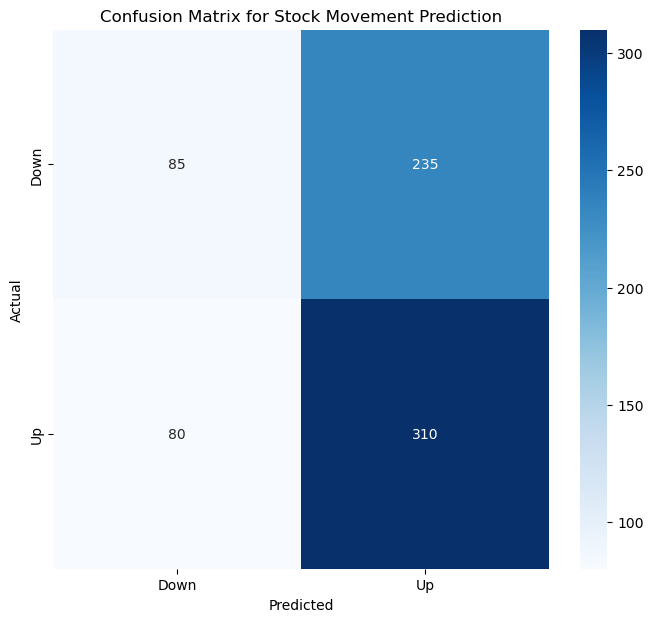

In [85]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#  Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 7))  # Set the size of the plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])

#  Add titles and labels for clarity
plt.title('Confusion Matrix for Stock Movement Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#  Display the plot
plt.show()


In [81]:
# Create a DataFrame with a new data point (the features for which we want to predict momentum)
# The data is provided as a list of values, corresponding to the columns defined in 'features'.
new_data = pd.DataFrame([[0.299449, 0.3265, 0.328, 0.32175, 0.325, 391752000, 225, 151, 0.451426, 0.159106, 0.7768, 0.06395, 0.330174, 0.3167, 42.85, 0.3167, 0.003879, 0.324457, 0.308943, 0.019616]], 
                        columns=features)

# Standardize the new data using the same scaler (MinMaxScaler) that was used to scale the training data.
# This step ensures that the new data is transformed in the same way as the training data, which is essential for accurate predictions.
new_data_scaled = scaler.fit_transform(new_data)

# Use the trained RandomForest model to predict the momentum for the new data point.
# The model will output '1' if it predicts the stock will go up (positive trend), or '0' if it predicts the stock will go down (negative trend).
predicted_momentum = best_model_random.predict(new_data_scaled)

# Print the predicted momentum for the new data point.
# The result is either '1' (up) or '0' (down), based on the model's prediction.
print("Predicted Momentum (1 for Up, 0 for Down):", predicted_momentum[0])


Predicted Momentum (1 for Up, 0 for Down): 1


In [ ]:
print("Done.........")